<a href="https://colab.research.google.com/github/vinit5112/EEG-Seizure-Detection/blob/main/EEG_Final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
data = pd.read_csv('Epileptic Seizure Recognition.csv')
data

,Unnamed,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11495,X22.V1.114,-22,-22,-23,-26,-36,-42,-45,-42,-45,...,15,16,12,5,-1,-18,-37,-47,-48,2
11496,X19.V1.354,-47,-11,28,77,141,211,246,240,193,...,-65,-33,-7,14,27,48,77,117,170,1
11497,X8.V1.28,14,6,-13,-16,10,26,27,-9,4,...,-65,-48,-61,-62,-67,-30,-2,-1,-8,5
11498,X10.V1.932,-40,-25,-9,-12,-2,12,7,19,22,...,121,135,148,143,116,86,68,59,55,3


In [ ]:
#rows X columns
data.shape

(11500, 180)

In [ ]:
#combine {2,3,4,5} classes as 0 class (not epileptic seizure) and keep {1} class as 1 (epileptic seizure)
dic = {5: 0, 4: 0, 3: 0, 2: 0, 1: 1}
data['y'] = data['y'].map(dic)

In [ ]:
#counting binary classification number
print(data['y'].value_counts())

0    9200
1    2300
Name: y, dtype: int64


In [ ]:
#remove 'unnamed' column as it  has no relevent information
data = data.drop('Unnamed', axis = 1)

In [ ]:
#now let us have a look on the description of our data
data.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
count,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.00000,11500.00000,11500.000000,...,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000
mean,-11.581391,-10.911565,-10.187130,-9.143043,-8.009739,-7.003478,-6.502087,-6.68713,-6.55800,-6.168435,...,-10.145739,-11.630348,-12.943478,-13.668870,-13.363304,-13.045043,-12.705130,-12.426000,-12.195652,0.200000
std,165.626284,166.059609,163.524317,161.269041,160.998007,161.328725,161.467837,162.11912,162.03336,160.436352,...,164.652883,166.149790,168.554058,168.556486,167.257290,164.241019,162.895832,162.886311,164.852015,0.400017
min,-1839.000000,-1838.000000,-1835.000000,-1845.000000,-1791.000000,-1757.000000,-1832.000000,-1778.00000,-1840.00000,-1867.000000,...,-1867.000000,-1865.000000,-1642.000000,-1723.000000,-1866.000000,-1863.000000,-1781.000000,-1727.000000,-1829.000000,0.000000
25%,-54.000000,-55.000000,-54.000000,-54.000000,-54.000000,-54.000000,-54.000000,-55.00000,-55.00000,-54.000000,...,-55.000000,-56.000000,-56.000000,-56.000000,-55.000000,-56.000000,-55.000000,-55.000000,-55.000000,0.000000
50%,-8.000000,-8.000000,-7.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.00000,-7.00000,-7.000000,...,-9.000000,-10.000000,-10.000000,-10.000000,-10.000000,-9.000000,-9.000000,-9.000000,-9.000000,0.000000
75%,34.000000,35.000000,36.000000,36.000000,35.000000,36.000000,35.000000,36.00000,36.00000,35.250000,...,34.000000,34.000000,33.000000,33.000000,34.000000,34.000000,34.000000,34.000000,34.000000,0.000000
max,1726.000000,1713.000000,1697.000000,1612.000000,1518.000000,1816.000000,2047.000000,2047.00000,2047.00000,2047.000000,...,1777.000000,1472.000000,1319.000000,1436.000000,1733.000000,1958.000000,2047.000000,2047.000000,1915.000000,1.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11500 entries, 0 to 11499
Columns: 179 entries, X1 to y
dtypes: int64(179)
memory usage: 15.7 MB


In [ ]:
#Let us group all the Epileptic occureses and Non Epileptic
print('Number of records of Non Epileptic {0} VS Epilepttic {1}'.format(len(data[data['y'] == 0]), len(data[data['y'] == 1])))

Number of records of Non Epileptic 9200 VS Epilepttic 2300


In [ ]:
#Mean and std. deviation for epileptic
print('Totall Mean VALUE for Epiletic: {}'.format((data[data['y'] == 1].describe().mean()).mean()))
print('Totall Std VALUE for Epiletic: {}'.format((data[data['y'] == 1].describe().std()).std()))

Totall Mean VALUE for Epiletic: 290.129360958884
Totall Std VALUE for Epiletic: 53.56315864740058


In [ ]:
#Mean and std. deviation for non-epileptic
print('Totall Mean VALUE for NON Epiletic: {}'.format((data[data['y'] == 0].describe().mean()).mean()))
print('Totall Std VALUE for NON Epiletic: {}'.format((data[data['y'] == 0].describe().std()).std()))

Totall Mean VALUE for NON Epiletic: 1260.098927262616
Totall Std VALUE for NON Epiletic: 15.561044289100993


In [ ]:
#big diffrence between values hence we will try to scale/normalize data

[(<Figure size 800x400 with 1 Axes>,
  Text(0.5, 1.0, 'Not Epileptic'),
  [<matplotlib.lines.Line2D at 0x7ff04bf84940>]),
 (<Figure size 800x400 with 1 Axes>,
  Text(0.5, 1.0, 'Not Epileptic'),
  [<matplotlib.lines.Line2D at 0x7ff04c099360>]),
 (<Figure size 800x400 with 1 Axes>,
  Text(0.5, 1.0, 'Not Epileptic'),
  [<matplotlib.lines.Line2D at 0x7ff054e40700>]),
 (<Figure size 800x400 with 1 Axes>,
  Text(0.5, 1.0, 'Not Epileptic'),
  [<matplotlib.lines.Line2D at 0x7ff054de37c0>]),
 (<Figure size 800x400 with 1 Axes>,
  Text(0.5, 1.0, 'Not Epileptic'),
  [<matplotlib.lines.Line2D at 0x7ff055037b50>])]

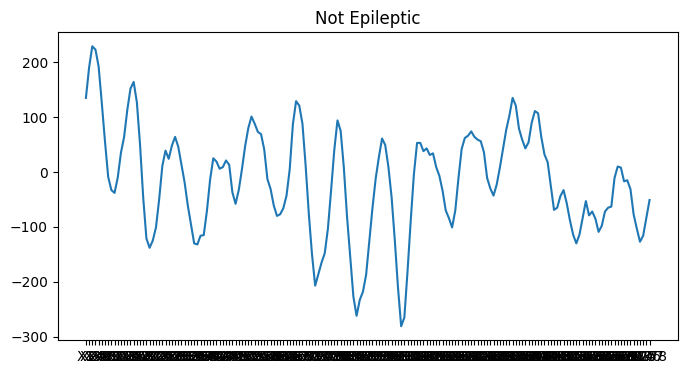

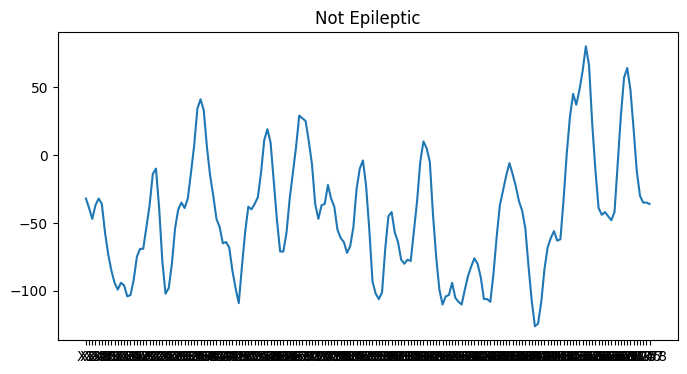

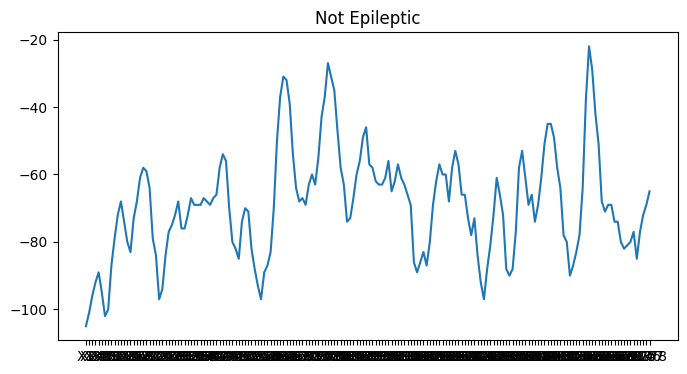

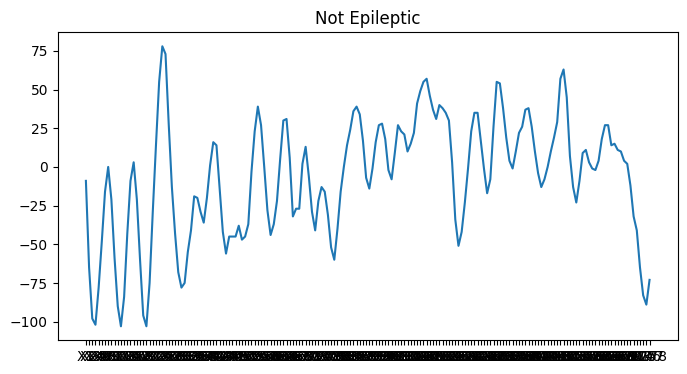

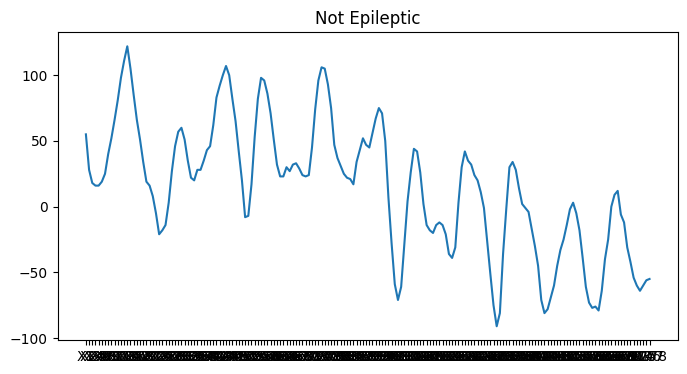

In [ ]:
#Few cases of Non-Epileptic case
[(plt.figure(figsize=(8,4)), plt.title('Not Epileptic'), plt.plot(data[data['y'] == 0].iloc[i][0:-1])) for i in range(5)]

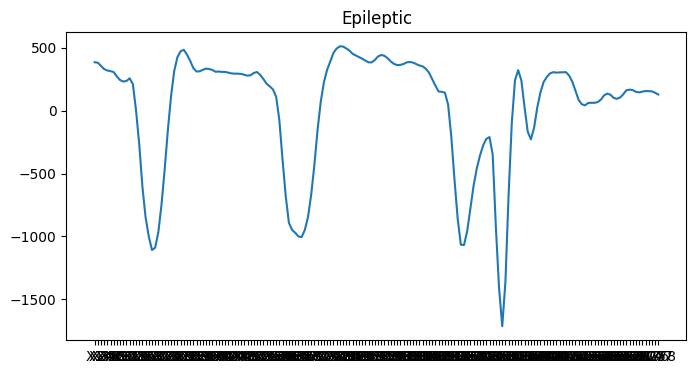

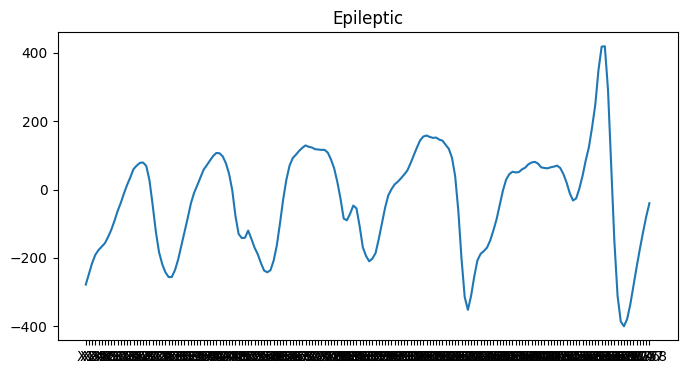

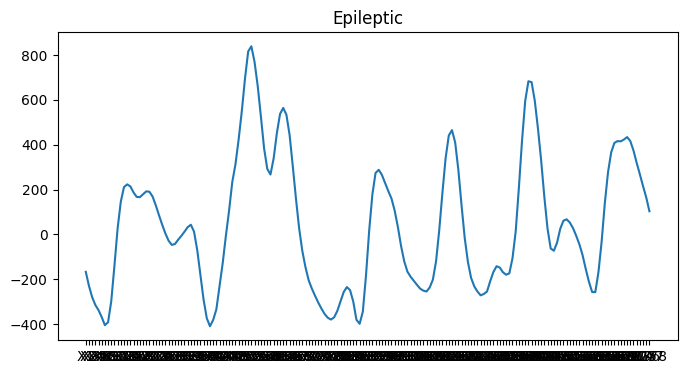

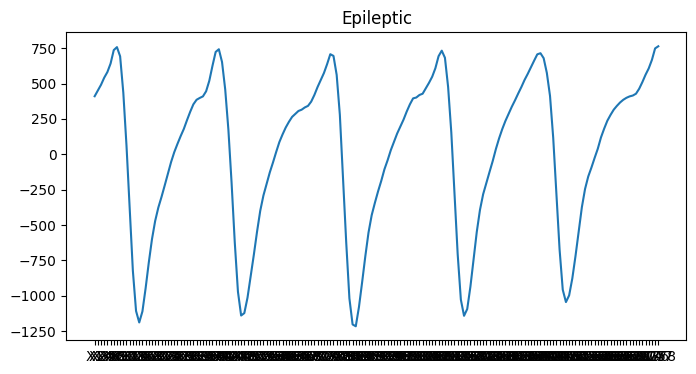

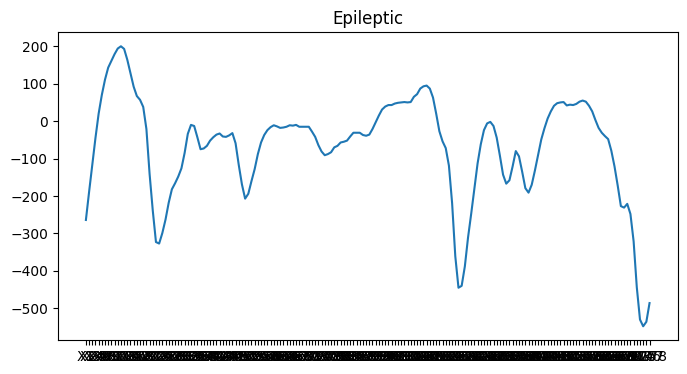

In [ ]:
#Few cases of Epileptic case
[(plt.figure(figsize=(8,4)), plt.title('Epileptic'), plt.plot(data[data['y'] == 1].iloc[i][0:-1])) for i in range(5)];

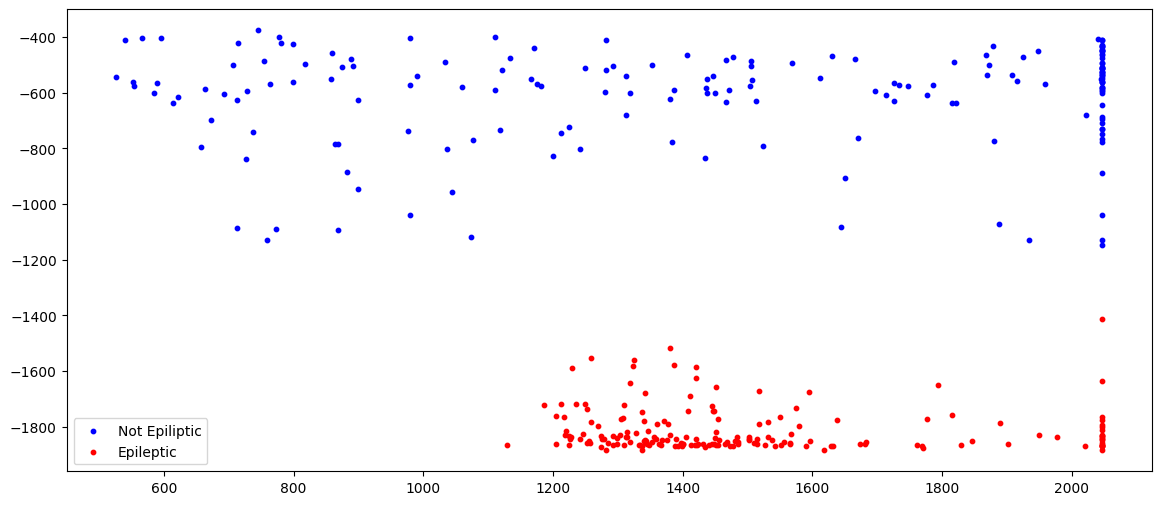

In [ ]:
#lists of arrays containing all data without y column
not_epileptic = [data[data['y']==0].iloc[:, range(0, len(data.columns)-1)].values]
epileptic = [data[data['y']==1].iloc[:, range(0, len(data.columns)-1)].values]

#We will create and calculate 2d indicators in order plot data in 2 dimensions;

def indic(data):
    """Indicators can be different. In our case we use just min and max values
    Additionally, it can be mean and std or another combination of indicators"""
    max = np.max(data, axis=1)
    min = np.min(data, axis=1)
    return max, min

x1,y1 = indic(not_epileptic)
x2,y2 = indic(epileptic)

fig = plt.figure(figsize=(14,6))
ax1 = fig.add_subplot(111)

ax1.scatter(x1, y1, s=10, c='b', label='Not Epiliptic')
ax1.scatter(x2, y2, s=10, c='r', label='Epileptic')
plt.legend(loc='lower left');
plt.show()


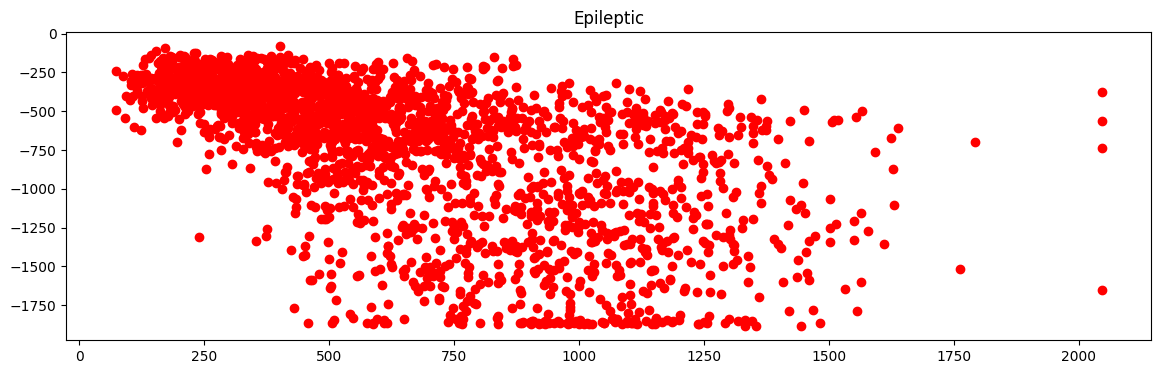

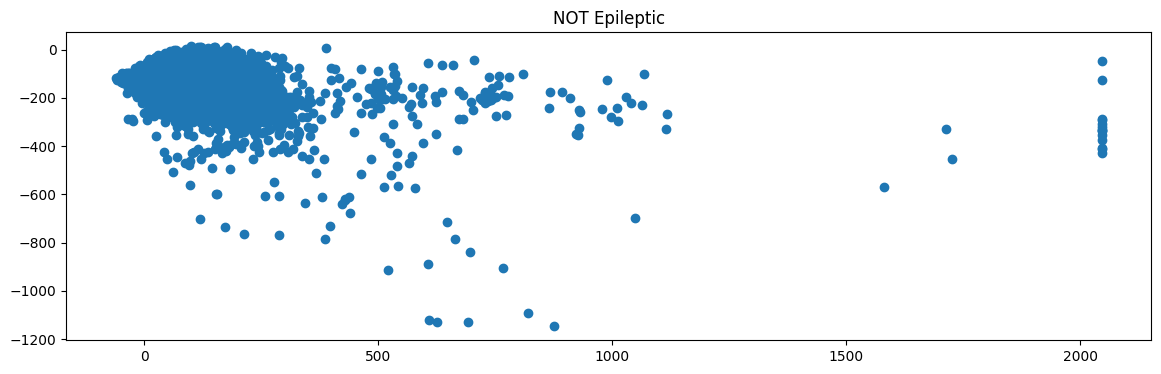

In [ ]:
#Just Epileptic
x,y = indic(data[data['y']==1].iloc[:, range(0, len(data.columns)-1)].values)
plt.figure(figsize=(14,4))
plt.title('Epileptic')
plt.scatter(x, y, c='r')

#Just Non-Epileptic
x,y = indic(data[data['y']==0].iloc[:, range(0, len(data.columns)-1)].values)
plt.figure(figsize=(14,4))
plt.title('NOT Epileptic')
plt.scatter(x, y)

In [ ]:
data.shape

(11500, 179)

ML Model

In [ ]:
import imblearn
#use undersampling approach in order to prevent imbalanced issue
oversample = imblearn.over_sampling.RandomOverSampler(sampling_strategy='minority')
# fit and apply the transform
X, y = oversample.fit_resample(data.drop('y', axis=1), data['y'])

X.shape, y.shape

((18400, 178), (18400,))

In [ ]:
#Check the balance for y
#Let us group all the Epileptic occureses and Non Epileptic
print('Number of records of Non Epileptic {0} VS Epilepttic {1}'.format(len(y == True), len(y == False)))


Number of records of Non Epileptic 18400 VS Epilepttic 18400


In [ ]:
data.shape

(11500, 179)

In [ ]:
#Noramlizing  Data
from sklearn.preprocessing import normalize, StandardScaler
normalized_df = pd.DataFrame(normalize(X))
normalized_df

,0,1,2,3,4,5,6,7,8,9,...,168,169,170,171,172,173,174,175,176,177
0,0.104109,0.146523,0.176599,0.171972,0.148066,0.096397,0.042415,-0.006941,-0.025449,-0.029305,...,0.006169,-0.013110,-0.011568,-0.023906,-0.059381,-0.079431,-0.097939,-0.089456,-0.064008,-0.039330
1,0.061209,0.060575,0.056452,0.052488,0.050743,0.049951,0.048682,0.043132,0.038692,0.036789,...,0.026640,0.026006,0.023786,0.023152,0.024103,0.024896,0.024737,0.024420,0.022676,0.020456
2,-0.038444,-0.046854,-0.056465,-0.044451,-0.038444,-0.043250,-0.068479,-0.087701,-0.102118,-0.112930,...,0.034840,0.068479,0.076889,0.057666,0.022826,-0.014417,-0.036042,-0.042048,-0.042048,-0.043250
3,-0.111276,-0.107037,-0.101738,-0.097499,-0.094319,-0.100678,-0.108096,-0.105977,-0.092200,-0.083722,...,-0.084781,-0.086901,-0.085841,-0.084781,-0.081602,-0.090080,-0.081602,-0.076303,-0.073124,-0.068885
4,-0.017182,-0.124093,-0.187094,-0.194730,-0.148911,-0.091638,-0.030546,0.000000,-0.040092,-0.112638,...,0.019091,0.007636,0.003818,-0.022909,-0.061092,-0.078274,-0.124093,-0.158457,-0.169912,-0.139366
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18395,-0.090132,-0.067441,-0.054678,-0.040654,-0.031515,-0.035612,-0.053733,-0.069805,-0.072956,-0.054836,...,0.027733,0.013236,0.006303,0.003467,0.006776,0.016230,0.026000,0.041284,0.055623,0.073114
18396,-0.053147,-0.043768,-0.046547,-0.050715,-0.050715,-0.042726,-0.006600,0.050715,0.116019,0.146240,...,-0.044463,-0.044810,-0.045505,-0.044463,-0.043768,-0.040642,-0.037168,-0.034042,-0.032652,-0.031610
18397,0.099671,0.106828,0.104575,0.098876,0.076211,0.043871,-0.000663,-0.051161,-0.091586,-0.117962,...,0.023592,0.031412,0.037907,0.044136,0.051426,0.059909,0.074753,0.098743,0.120082,0.129890
18398,-0.027260,-0.037098,-0.034023,-0.009428,0.026850,0.053700,0.063333,0.058209,0.048576,0.035458,...,0.151465,0.128920,0.110678,0.100020,0.096126,0.093872,0.091822,0.091412,0.087928,0.076040


In [ ]:
#Concat back in order to check description:
normalized_df['y'] = y

print('Normalized Totall Mean VALUE for Epiletic: {}'.format((normalized_df[normalized_df['y'] == 1].describe().mean()).mean()))
print('Normalized Totall Std VALUE for Epiletic: {}'.format((normalized_df[normalized_df['y'] == 1].describe().std()).std()))

print('Normalized Totall Mean VALUE for NOT Epiletic: {}'.format((normalized_df[normalized_df['y'] == 0].describe().mean()).mean()))
print('Normalized Totall Std VALUE for NOT Epiletic: {}'.format((normalized_df[normalized_df['y'] == 0].describe().std()).std()))

Normalized Totall Mean VALUE for Epiletic: 1150.0133401645146
Normalized Totall Std VALUE for Epiletic: 0.022557701225559574
Normalized Totall Mean VALUE for NOT Epiletic: 1150.0065271687797
Normalized Totall Std VALUE for NOT Epiletic: 0.002007429551034863


In [ ]:
#split dataset into  train and test and than invoke validation approach
from sklearn.model_selection import train_test_split
X = normalized_df.drop('y', axis=1)
y = normalized_df['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

#Check the shapes after splitting
he = X_train, X_test, y_train, y_test
[arr.shape for arr in he]

[(12880, 178), (5520, 178), (12880,), (5520,)]

In [ ]:
#model
# from sklearn.ensemble import RandomForestClassifier
# clf =RandomForestClassifier()
from sklearn.svm import SVC
clf = SVC()

In [ ]:
# train model
train_data = clf.fit(X_train,y_train)

In [ ]:
# predictions
predictions = train_data.predict(X_test)
predictions

array([1, 1, 0, ..., 0, 0, 1])

In [ ]:
score = train_data.score(X_test, y_test)
score

0.9106884057971014

In [ ]:
import pickle
with open('train_data.pkl', 'wb') as file:
    pickle.dump(train_data, file)